In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import circles
import os
import time
import sys
from matplotlib.collections import LineCollection

def print_fl(x):
    print(x)
    sys.stdout.flush()

In [31]:
InFile = "output_200_0.14_0.07.npz"
OutDir = "testje"

if not os.path.exists(OutDir):
    os.makedirs(OutDir)

In [32]:
Data = np.load(InFile)

In [33]:
NumSteps = Data["SaveLocation"].shape[0]

ExtremeBorders = np.zeros((NumSteps, 2, 2))
ExtremeBorders[:,0] = np.min(Data["SaveLocation"], axis=1)
ExtremeBorders[:,1] = np.max(Data["SaveLocation"], axis=1)

Centers = (ExtremeBorders[:,1,:] + ExtremeBorders[:,0,:])/2
Sizes = ExtremeBorders[:,1,:] - ExtremeBorders[:,0,:]
ExtremeSize = np.max(Sizes)

ExtremePositions = np.zeros((2,2)) # minmax x dim
ExtremePositions[0,:] = np.min(ExtremeBorders[:,0,:], axis=0)
ExtremePositions[1,:] = np.max(ExtremeBorders[:,1,:], axis=0)
MigrationReach = np.max(ExtremePositions[1,:] - ExtremePositions[0,:])
MigrationCenter = (ExtremePositions[1,:] + ExtremePositions[0,:])/2

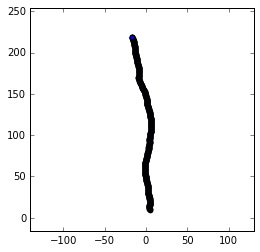

In [34]:
plt.scatter(Centers[:,0], Centers[:,1])
plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * 1.1)
plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * 1.1)
plt.gca().set_aspect('equal')

(91.418219556989897, 137.05228088814013)

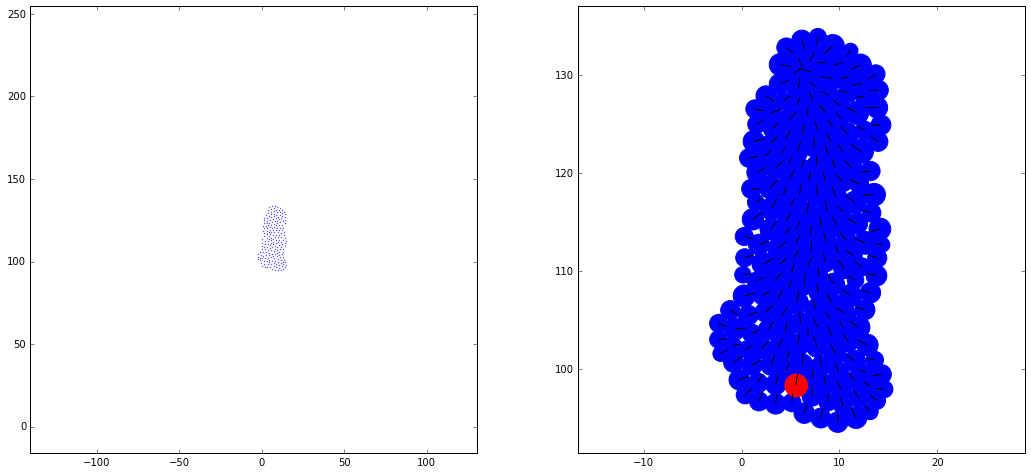

In [35]:
SaveLocation = Data["SaveLocation"]
SaveOrientation = Data["SaveOrientation"]
Radius = Data["Radius"]

NumParticles = SaveLocation.shape[1]

MarginFactorSheet = 1.1
MarginFactorCloseup = 1.0

t = 500

plt.figure(figsize=(18,8))
axSheet = plt.subplot(121, aspect='equal')
#circles.circles(SaveLocation[t,:,0], SaveLocation[t,:,1], Radius, fc='none')
plt.scatter(SaveLocation[t,:,0], SaveLocation[t,:,1], s=0.1, color='b')

plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)
plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)

axCloseUp = plt.subplot(122, aspect='equal')
circles.circles(SaveLocation[t,1:,0], SaveLocation[t,1:,1], Radius[1:])
circles.circles(SaveLocation[t,0,0], SaveLocation[t,0,1], Radius[0], color='r')

EndPoints = SaveLocation[t,:,:] + np.array([Radius * np.cos(SaveOrientation[t,:]), Radius * np.sin(SaveOrientation[t,:])]).T
LineSegments = np.zeros((NumParticles, 2, 2))
LineSegments[:,0,:] = SaveLocation[t,:,:]
LineSegments[:,1,:] = EndPoints

lines = LineCollection(LineSegments, color='k')
axCloseUp.add_collection(lines)

plt.xlim(Centers[t,0] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
plt.ylim(Centers[t,1] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)

In [ ]:
SaveLocation = Data["SaveLocation"]
SaveOrientation = Data["SaveOrientation"]
Radius = Data["Radius"]

NumParticles = SaveLocation.shape[1]

MarginFactorSheet = 1.1
MarginFactorCloseup = 1.0

for t in range(NumSteps):
    plt.figure(figsize=(18,8))
    axSheet = plt.subplot(121, aspect='equal')
    circles.circles(SaveLocation[t,:,0], SaveLocation[t,:,1], Radius, fc='none')

    plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)
    plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)

    axCloseUp = plt.subplot(122, aspect='equal')
    circles.circles(SaveLocation[t,1:,0], SaveLocation[t,1:,1], Radius[1:], fc='none')
    circles.circles(SaveLocation[t,0,0], SaveLocation[t,0,1], Radius[0], color='r', fc='none')

    EndPoints = SaveLocation[t,:,:] + np.array([Radius * np.cos(SaveOrientation[t,:]), Radius * np.sin(SaveOrientation[t,:])]).T
    LineSegments = np.zeros((NumParticles, 2, 2))
    LineSegments[:,0,:] = SaveLocation[t,:,:]
    LineSegments[:,1,:] = EndPoints

    lines = LineCollection(LineSegments, color='k')
    axCloseUp.add_collection(lines)

    plt.xlim(Centers[t,0] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
    plt.ylim(Centers[t,1] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
    
    plt.savefig(OutDir + ("/frame-%08d.png" % t), dpi=300)
    plt.cla()
    plt.clf()
    plt.close()
    if (t % (0.01) * NumSteps) < 1:
        print_fl("Progress: %d%%" % (t*100/NumSteps))

(0, 10)

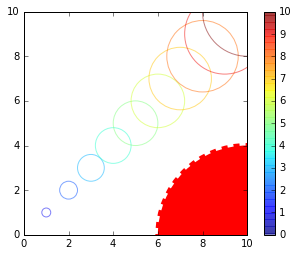

In [37]:
plt.figure(figsize=(6,4))
ax = plt.subplot(aspect='equal')

#plot a set of circle
a = np.arange(11)
out = circles.circles(a, a, a*0.2, c=a, alpha=0.5, fc='none')
plt.colorbar() 
#or colorbar(out)

#plot a circle (the lower-right one)
circles.circles(1, 0, 0.4, 'r', ls='--', lw=5, fc='none', transform=ax.transAxes)

plt.xlim(0,10)
plt.ylim(0,10)